# **Importing Libraries**

In [ ]:
#import Libraries
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

# **Loading** **Dataset**

In [ ]:
df = pd.read_csv('/home/Telecom-Customer-Churn.csv')


# **Exploratory Data Analysis**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7034,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7035,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7036,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7037,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7038,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7039, 21)

In [ ]:
df.size

147819

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039 entries, 0 to 7038
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7039 non-null   object 
 1   gender            7039 non-null   object 
 2   SeniorCitizen     7039 non-null   int64  
 3   Partner           7039 non-null   object 
 4   Dependents        7039 non-null   object 
 5   tenure            7039 non-null   int64  
 6   PhoneService      7039 non-null   object 
 7   MultipleLines     7039 non-null   object 
 8   InternetService   7039 non-null   object 
 9   OnlineSecurity    7039 non-null   object 
 10  OnlineBackup      7039 non-null   object 
 11  DeviceProtection  7039 non-null   object 
 12  TechSupport       7039 non-null   object 
 13  StreamingTV       7039 non-null   object 
 14  StreamingMovies   7039 non-null   object 
 15  Contract          7039 non-null   object 
 16  PaperlessBilling  7039 non-null   object 


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Basic Data Cleaning:

In [ ]:
df['TotalCharges'].dtype

dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [ ]:
df.skew(numeric_only= True)

SeniorCitizen     1.834132
tenure            0.239123
MonthlyCharges   -0.220657
TotalCharges      0.960853
dtype: float64

In [ ]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016709,0.219826,0.102407
tenure,0.016709,1.000000,0.248337,0.825975
MonthlyCharges,0.219826,0.248337,1.000000,0.651284
TotalCharges,0.102407,0.825975,0.651284,1.000000


# **Feature** **distribution**

# Numerical feature distribution

In [ ]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7039.000000,7039.000000,7028.000000
mean,32.376332,64.762963,2284.005827
std,24.561896,30.087756,2267.193201
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.250000
50%,29.000000,70.350000,1397.950000
75%,55.000000,89.850000,3796.912500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

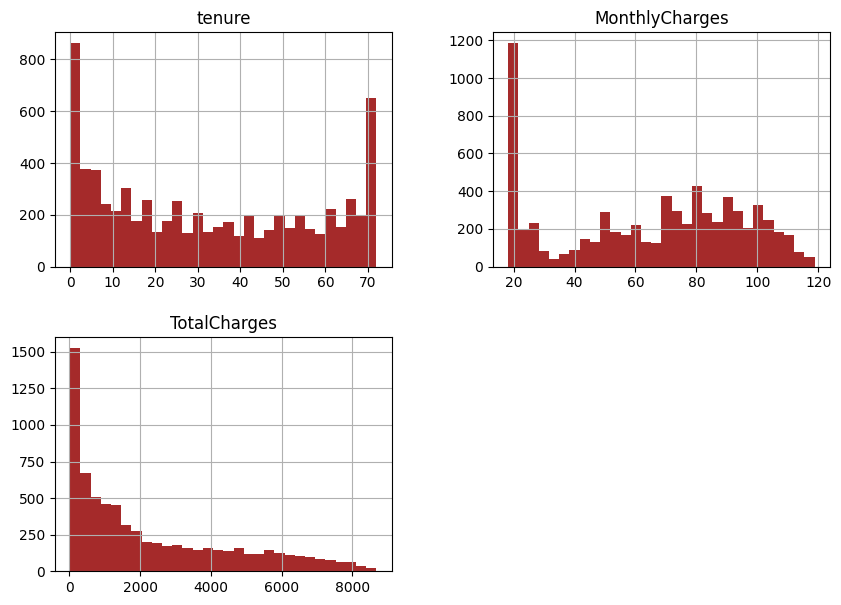

In [ ]:
df[numerical_features].hist(bins=30,color='brown', figsize=(10, 7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

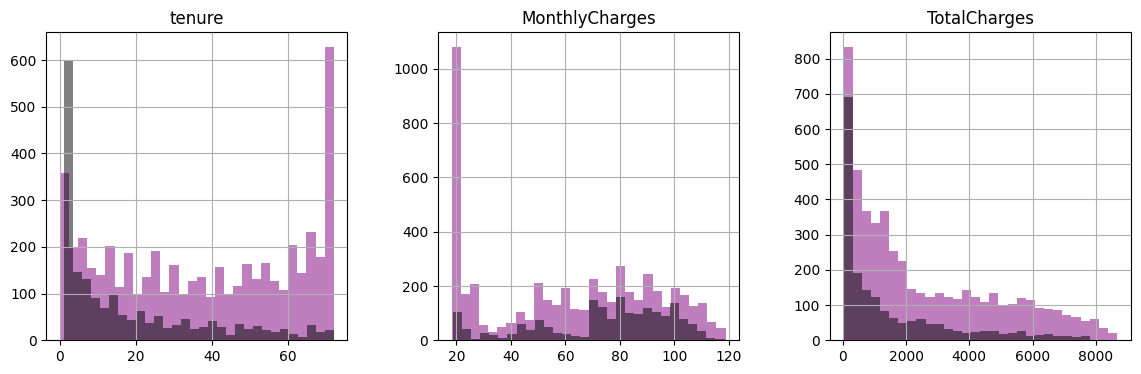

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="purple", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="black", alpha=0.5, ax=ax)

# Categorical feature distribution

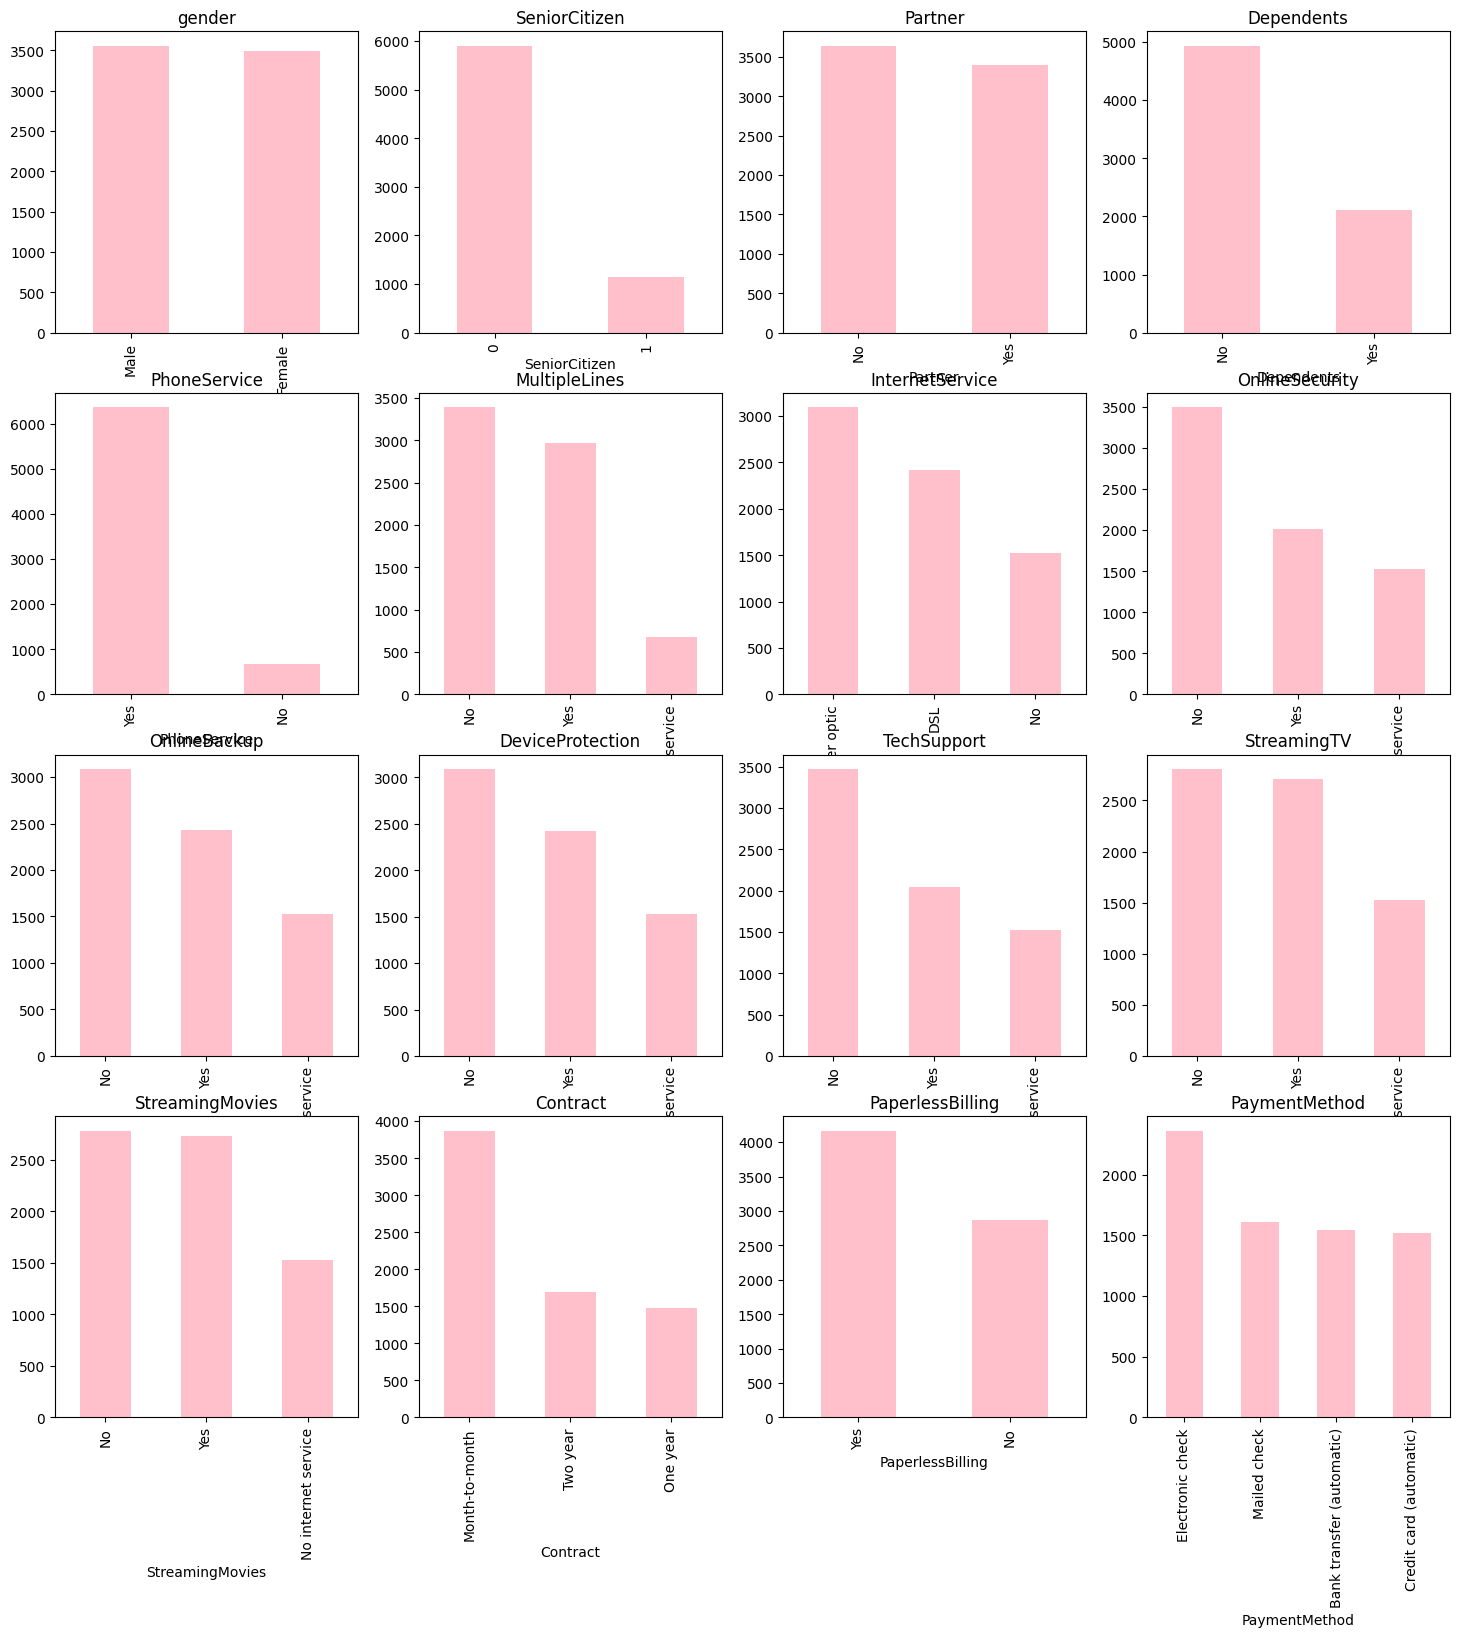

In [ ]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(18,18))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar',color='pink', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

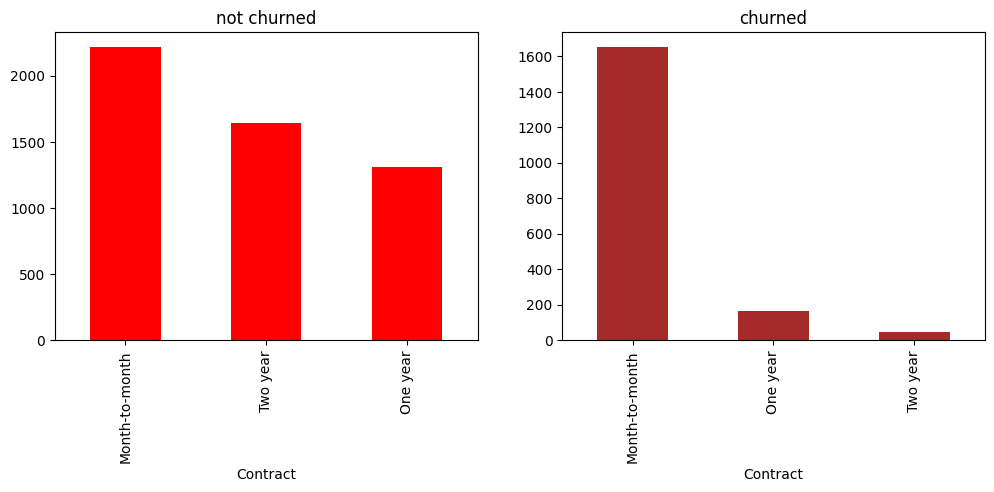

In [ ]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar',color='red', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar',color='brown', ax=ax[1]).set_title('churned')

# Target variable distribution

Text(0.5, 1.0, 'churned')

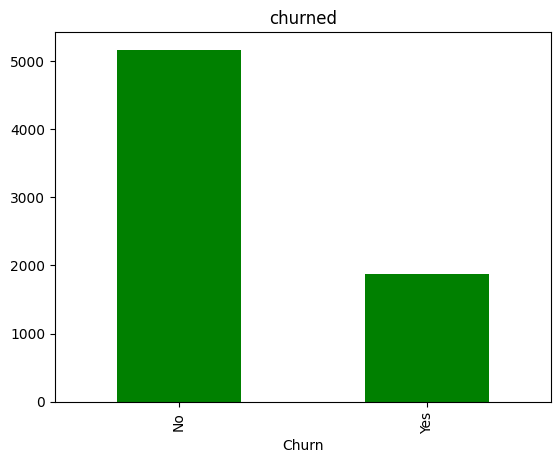

In [ ]:
df[target].value_counts().plot(kind='bar',color='green').set_title('churned')

# **Outliers**  **Analysis** **with** **IQR** **Method**

In [ ]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


# **Cleaning** **and** **Transforming** **Data**

In [ ]:
df.drop(['customerID'],axis = 1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7035,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7036,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7037,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# One Hot Encoding

In [ ]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],dtype=int)

In [ ]:
df1.drop('customerID', axis=1).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
df1.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contrac

# Rearranging Columns

In [ ]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [ ]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df1.shape

(7039, 31)

In [ ]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

# Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=46)

# **Machine Learning Model Evaluations and Predictions**

#  Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
predLR = logmodel.predict(X_test)

In [ ]:
predLR

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
Y_test

6356    0
1123    0
2176    0
4181    0
3038    0
       ..
5230    0
4941    1
126     1
2948    1
1422    0
Name: Churn_Yes, Length: 2112, dtype: int64

In [ ]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1558
           1       0.67      0.55      0.60       554

    accuracy                           0.81      2112
   macro avg       0.76      0.73      0.74      2112
weighted avg       0.80      0.81      0.80      2112



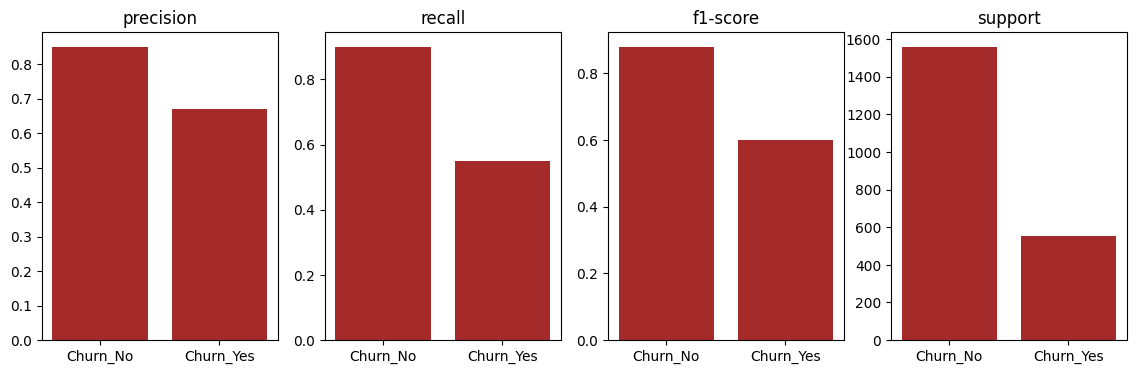

In [ ]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4,  figsize=(14, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()],color='brown')
    ax[i].set_title(metric)

# display the plot
plt.show()

In [ ]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

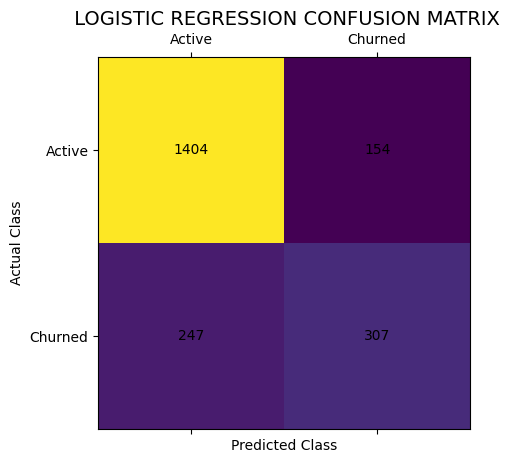

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])

plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
logmodel.score(X_train, Y_train)

0.8049523036330424

In [ ]:
accuracy_lr=accuracy_score(Y_test, predLR)
print("Logistic Regression accuracy:",accuracy_lr)

Logistic Regression accuracy: 0.8101325757575758


# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1558
           1       0.67      0.49      0.57       554

    accuracy                           0.80      2112
   macro avg       0.75      0.70      0.72      2112
weighted avg       0.79      0.80      0.79      2112



In [ ]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

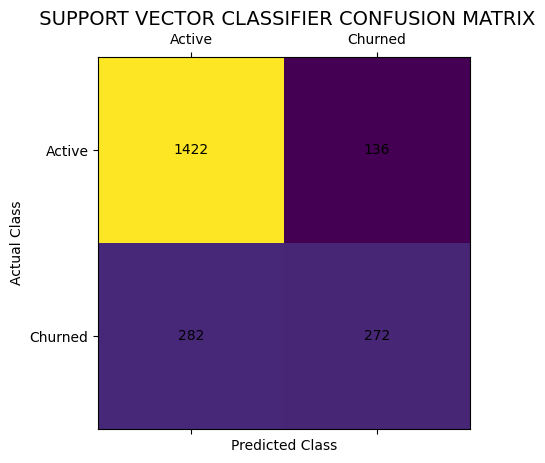

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title(" SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
svc.score(X_train,Y_train)

0.8185508422975442

In [ ]:
accuracy_svc = accuracy_score(Y_test, y_pred_svc)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8020833333333334


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1558
           1       0.49      0.50      0.49       554

    accuracy                           0.73      2112
   macro avg       0.65      0.66      0.66      2112
weighted avg       0.73      0.73      0.73      2112



In [ ]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

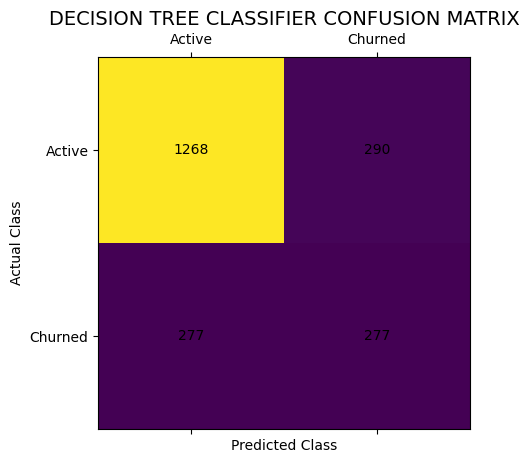

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
dtc.score(X_train,Y_train)

0.9981733306271565

In [ ]:
accuracy_dtc=accuracy_score(Y_test, y_pred_dtc)
print("Decision Tree Classifier accuracy is :",accuracy_dtc)

Decision Tree Classifier accuracy is : 0.7315340909090909


# KNN(K-Nearest Neighbour)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

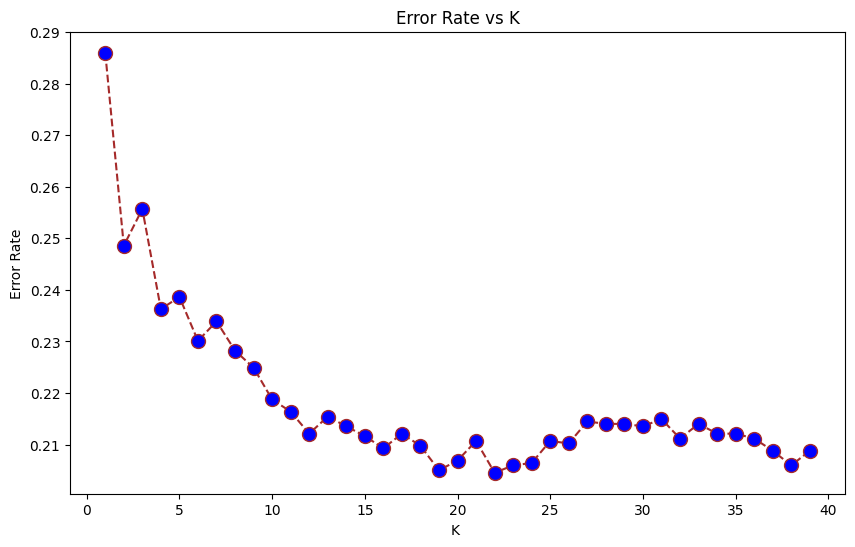

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'brown',linestyle = '--',marker = 'o',markerfacecolor='blue',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K ')
plt.ylabel('Error Rate')

In [ ]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1558
           1       0.61      0.53      0.57       554

    accuracy                           0.79      2112
   macro avg       0.72      0.70      0.71      2112
weighted avg       0.78      0.79      0.78      2112



In [ ]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

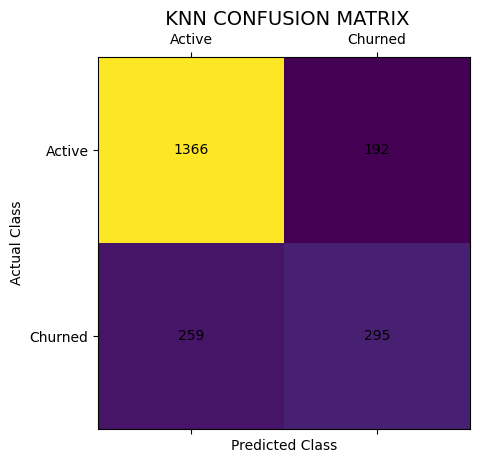

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title(" KNN CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
knn.score(X_train,Y_train)

0.8012989648873554

In [ ]:
accuracy_knn=accuracy_score(Y_test, pred_knn)
print("KNN accuracy is :",accuracy_knn)

KNN accuracy is : 0.7864583333333334


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
rf.fit(X_train, Y_train)

y_pred_rf= rf.predict(X_test)


In [ ]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1558
           1       0.67      0.46      0.54       554

    accuracy                           0.80      2112
   macro avg       0.75      0.69      0.71      2112
weighted avg       0.78      0.80      0.78      2112



In [ ]:
confusion_matrix_rf = confusion_matrix(Y_test, y_pred_rf)

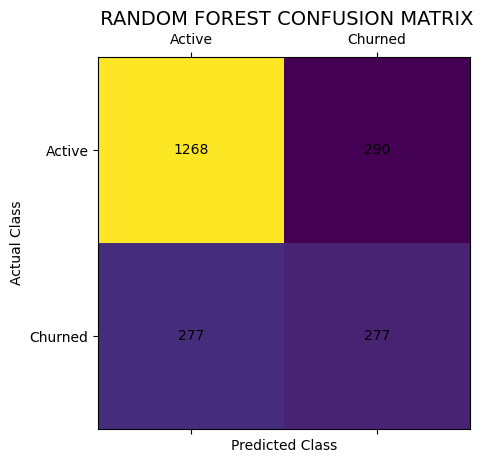

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_rf)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

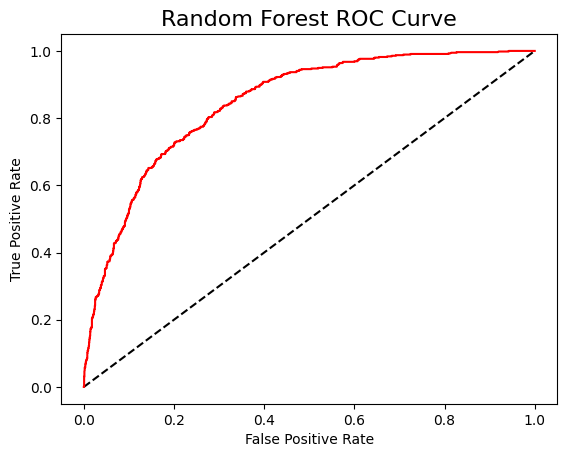

In [ ]:
y_rfpred_prob = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(Y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [ ]:
rf.score(X_train,Y_train)

0.8151004668155064

In [ ]:
accuracy_rf=accuracy_score(Y_test, y_pred_rf)
print("Random Forest accuracy is :",accuracy_rf)

Random Forest accuracy is : 0.7978219696969697


# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()

ab.fit(X_train,Y_train)
y_pred_ab = ab.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1558
           1       0.66      0.55      0.60       554

    accuracy                           0.81      2112
   macro avg       0.75      0.72      0.74      2112
weighted avg       0.80      0.81      0.80      2112



In [ ]:
confusion_matrix_ab = confusion_matrix(Y_test, y_pred_ab)

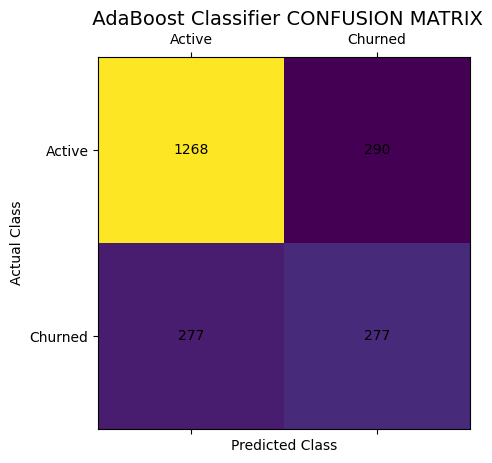

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_ab)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title(" AdaBoost Classifier CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
ab.score(X_train,Y_train)

0.8096204586969759

In [ ]:
accuracy_ab=accuracy_score(Y_test, y_pred_ab)
print("AdaBoost Classifier accuracy is :",accuracy_ab)

AdaBoost Classifier accuracy is : 0.8072916666666666


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

gbc.fit(X_train, Y_train)
y_pred_gbc = gbc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1558
           1       0.66      0.51      0.58       554

    accuracy                           0.80      2112
   macro avg       0.75      0.71      0.73      2112
weighted avg       0.79      0.80      0.80      2112



In [ ]:
confusion_matrix_gbc = confusion_matrix(Y_test, y_pred_gbc)

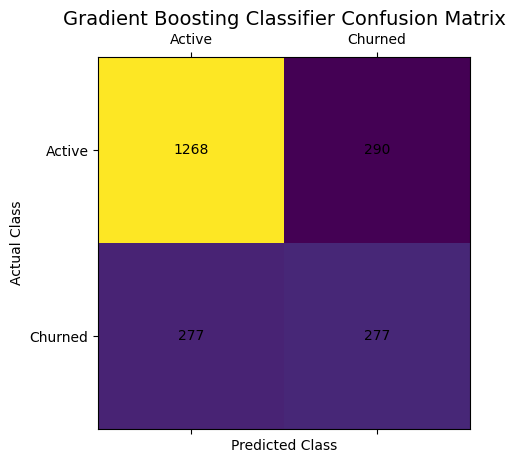

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_gbc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

In [ ]:
gbc.score(X_train,Y_train)

0.8309316013801502

In [ ]:
accuracy_gbc=accuracy_score(Y_test, y_pred_gbc)
print("Gradient Boost Classifier accuracy is :",accuracy_gbc)

Gradient Boost Classifier accuracy is : 0.8039772727272727


# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, Y_train)
predictions = eclf1.predict(X_test)


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1558
           1       0.67      0.54      0.60       554

    accuracy                           0.81      2112
   macro avg       0.76      0.72      0.74      2112
weighted avg       0.80      0.81      0.80      2112



In [ ]:
confusion_matrix_final = confusion_matrix(Y_test, predictions)

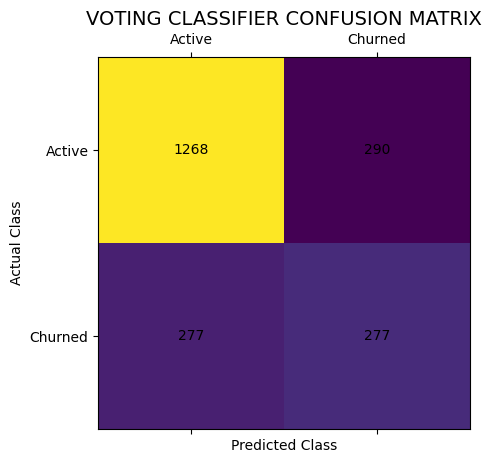

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_final)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Active", "Churned"])
plt.yticks([0, 1], ["Active", "Churned"])
plt.title("VOTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:

print("Final Accuracy Score of voting classifier: ")
print(accuracy_score(Y_test, predictions))

Final Accuracy Score of voting classifier: 
0.8106060606060606
